# Laborator

**Sarcină:** Dezbateți și adnotați rezolvările problemelor

## Regresie polinomială

### Cerință

Un magazin de înghețată vrea să prezică vânzările zilnice în funcție de temperatură.

Date:
- Temperatură (&deg;C): `[15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40]`
- Vânzări (unități): `[20, 35, 50, 70, 100, 130, 170, 190, 220, 235, 250]`

Sarcini:
1. Vizualizarea datelor (linear vs curved)
2. Antrenarea modelelor de regresie polinomială de grad 1, 2 și 3
3. Calculare MAE, MSE, RMSE și R<sup>2</sup>
4. Determinare ce temperatură e optimă
5. Predicție pentru 28&deg;C
6. Discuție overfitting vs underfitting

### Rezolvare

Importăm bibliotecile necesare.

In [1]:
import matplotlib.pyplot as plt # pentru grafice
import numpy as np # pentru calcul algebric
from sklearn.linear_model import LinearRegression # algoritmul principal de regresie
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # metrici de evaluare
from sklearn.preprocessing import PolynomialFeatures # pentru diferitele grade polinomiale

Definim datele cu care vom lucra (din enunțul problemei).

In [2]:
temperature = np.array([15, 18, 20, 22, 25, 27, 30, 32, 35, 37, 40]).reshape(-1, 1) # temperaturile
sales = np.array([20, 35, 50, 70, 100, 130, 170, 190, 220, 235, 250]) # unitățile vândute

Trasăm grafic punctele din textul problemei pentru vizualizare.

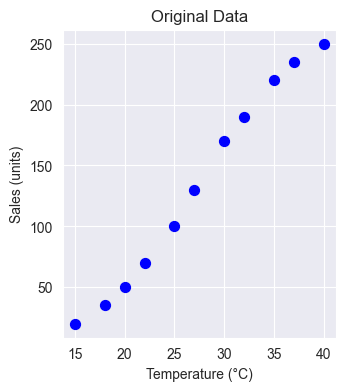

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(temperature, sales, color='blue', s=50)
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales (units)')
plt.title('Original Data')
plt.grid(True)

Pregătim variabilele necesare pentru antrenarea, salvarea și utilizarea modelelor de regresie polinomială.

In [4]:
degrees = [1, 2, 3] # vom calcula regresii polinomiale de ordinul 1, 2 și 3
models = {} # salvăm modelele de regresie
predictions = {} # salvăm predicțiile acestora

Definim o funcție care pentru un grad polinomial dat (1, 2, 3 etc.) crează și antrenează un model de regresie polinomială. După antrenare afișează graficul fiecărei funcții rezultate.

In [5]:
# pentru antrenarea și salvarea a câte un model de regresie pentru fiecare grad
def train_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(temperature) # transformarea datelor de intrare (temperaturilor într-o formă adecvată funcției polinomiale)

    model = LinearRegression() # încărcarea modelului
    model.fit(X_poly, sales) # antrenarea modelului
    models[degree] = (poly, model) # salvarea modelului

    y_pred = model.predict(X_poly) # generarea predicțiilor
    predictions[degree] = y_pred # salvarea predicțiilor

    # calcularea metricilor de evaluare
    mae = mean_absolute_error(sales, y_pred)
    mse = mean_squared_error(sales, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(sales, y_pred)

    # afișarea metricilor de evaluare
    print(f"\n=== Polynomial Degree {degree} ===")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

    # afișarea coeficienților și a termenului liber a funcției
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_:.2f}")

    # pregătirea intervalelor de afișare pentru grafic
    temp_range = np.linspace(15, 40, 100).reshape(-1, 1)
    X_poly_range = poly.transform(temp_range)
    y_range = model.predict(X_poly_range)

    # afișarea graficului funcției
    plt.subplot(1, 3, degree)
    plt.scatter(temperature, sales, color='blue', s=50, label='Data')
    plt.plot(temp_range, y_range, color='red', linewidth=2, label=f'Degree {degree}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Sales (units)')
    plt.title(f'Degree {degree} (R²={r2:.4f})')
    plt.legend()
    plt.grid(True)

În continuare vom rula funcția pentru fiecare grad.


=== Polynomial Degree 1 ===
MAE:  7.72
MSE:  74.41
RMSE: 8.63
R²:   0.9884
Coefficients: [ 0.         10.21688877]
Intercept: -145.93


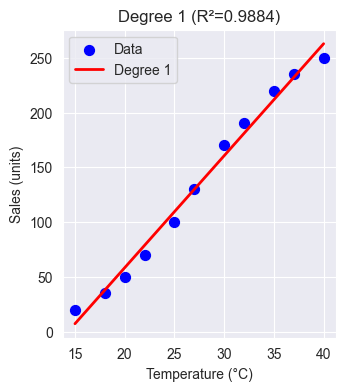

In [37]:
plt.figure(figsize=(12, 4)) # pentru afișarea corectă a graficului
train_and_plot(1)

Funcția de gradul 1 este o dreaptă. După antrenare aceasta este $f(x) = - 145.93 + 10.21688877 * x$.


=== Polynomial Degree 2 ===
MAE:  7.72
MSE:  74.38
RMSE: 8.62
R²:   0.9884
Coefficients: [ 0.00000000e+00  1.03936742e+01 -3.21289922e-03]
Intercept: -148.17


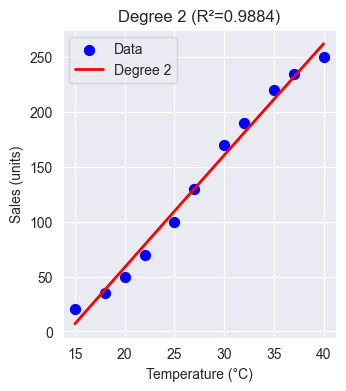

In [38]:
plt.figure(figsize=(12, 4)) # pentru afișarea corectă a graficului
train_and_plot(2)

Funcția de gradul 2 este o curbă. Modelul a învățat următorii coeficienț: $[0, 10.39..., -0.00321]$ și un intercept (termen liber) de $-148.17$. Aceștia corespund ecuației: $f(x) = -148.17 + 10.3936742 * x - 0.00321 * x ^ 2$.


=== Polynomial Degree 3 ===
MAE:  1.23
MSE:  2.94
RMSE: 1.71
R²:   0.9995
Coefficients: [ 0.00000000e+00 -3.81398155e+01  1.85092297e+00 -2.24771548e-02]
Intercept: 251.96


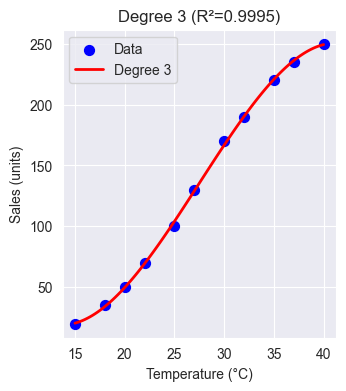

In [8]:
plt.figure(figsize=(12, 4)) # pentru afișarea corectă a graficului
train_and_plot(3)

Funcția de gradul 3 este o curbă. După antrenare aceasta este $f(x) = 251.96 - 38.1398155 * x + 1.85092297 * x ^ 2 - 0.0224771548 * x ^ 3$.

Din coeficienți, valoarea erorilor și grafice se poate observa că funcțiile de gradul 1, respectiv 2 sunt aproape identice pe intervalul ales. Pentru această problemă, regresia polinomială de gradul 3 este mai potrivită. Totuși, pe un interval mai larg se poate observa overfitting-ul acesteia.

Pentru fiecare model de regresie polinomială creată și salvată în `models` generăm o predicție pentru 28&deg;C.

In [9]:
print("\n=== Prediction for 28°C ===")
for degree in degrees:
    poly, model = models[degree]
    temp_28 = poly.transform([[28]])
    pred_28 = model.predict(temp_28)[0]
    print(f"Degree {degree}: {pred_28:.2f} units")


=== Prediction for 28°C ===
Degree 1: 140.14 units
Degree 2: 140.33 units
Degree 3: 141.75 units


## Regresie logistică

### Cerință

Dorim să prezicem dacă un student va promova un examen în funcție de orele de studiu.

Date:
- Ore studiate: `[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]`
- Promovat (1=Da, 0=Nu) : `[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]`

Sarcini:
1. Vizualizarea datelor
2. Antrenarea modelelor de regresie logistică
3. Trasarea curbei sigmoid
4. Calcularea matricii de confuzie, acurateții, preciziei, recall-ului și scorului F1
5. Predicție pentru un student care a studiat 4 ore
6. Găsirea orelor de studiu necesare pentru 90% șanse de a promova

### Rezolvare

Importăm bibliotecile necesare.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  # algoritmul principal de regresie
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # metrici de evaluare
import seaborn as sns  # aspect grafice

Definim datele cu care vom lucra (din enunțul problemei).

In [11]:
hours = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]).reshape(-1, 1)  # orele de studiu
passed = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # promovat: 1 = da, 0 = nu

Afișăm grafic datele problemei.

([<matplotlib.axis.YTick at 0x297bf6e7750>,
 [Text(0, 0, 'Failed'), Text(0, 1, 'Passed')])

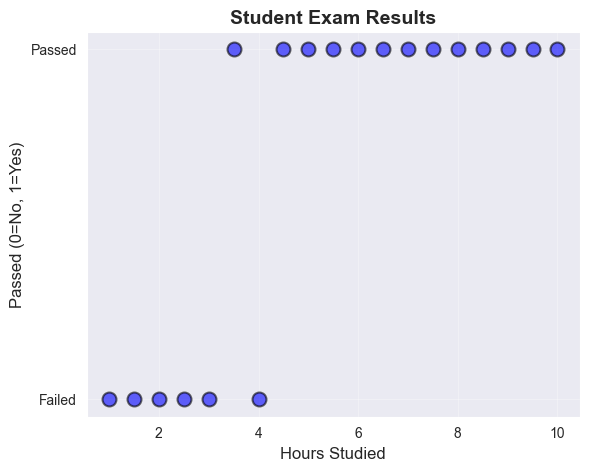

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(hours, passed, color='blue', s=100, alpha=0.6, edgecolors='black', linewidths=1.5)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Passed (0=No, 1=Yes)', fontsize=12)
plt.title('Student Exam Results', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yticks([0, 1], ['Failed', 'Passed'])

Creăm și antrenăm modelul.

In [13]:
model = LogisticRegression()
model.fit(hours, passed)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Afișăm formula rezultată după antrenare și coeficienții acesteia.

In [14]:
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
print(f"Model Coefficients:")
print(f"  Intercept (b0): {b0:.4f}")
print(f"  Coefficient (b1): {b1:.4f}")
print(f"\nModel equation: P(pass) = 1 / (1 + e^(-({b0:.4f} + {b1:.4f} * hours)))")

Model Coefficients:
  Intercept (b0): -4.9077
  Coefficient (b1): 1.3138

Model equation: P(pass) = 1 / (1 + e^(-(-4.9077 + 1.3138 * hours)))


Generăm predicțiile și afișăm graficul funcției.

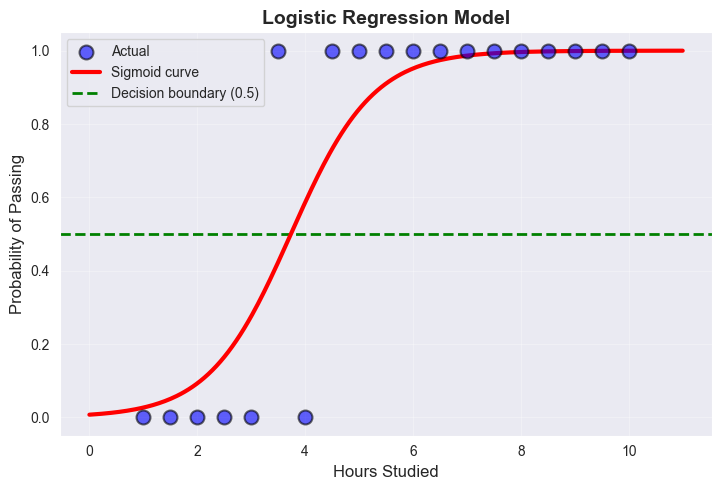

In [15]:
plt.figure(figsize=(14, 5))

hours_range = np.linspace(0, 11, 300).reshape(-1, 1)
probabilities = model.predict_proba(hours_range)[:, 1]

y_pred = model.predict(hours)

plt.subplot(1, 2, 2)
plt.scatter(hours, passed, color='blue', s=100, alpha=0.6, label='Actual',
            edgecolors='black', linewidths=1.5, zorder=3)
plt.plot(hours_range, probabilities, color='red', linewidth=3, label='Sigmoid curve', zorder=2)
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=2, label='Decision boundary (0.5)', zorder=1)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Probability of Passing', fontsize=12)
plt.title('Logistic Regression Model', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Generăm matricea de confuzie și o afișăm.


CONFUSION MATRIX

                Predicted
              Fail (0)  Pass (1)
Actual Fail       5         1
Actual Pass       1        12


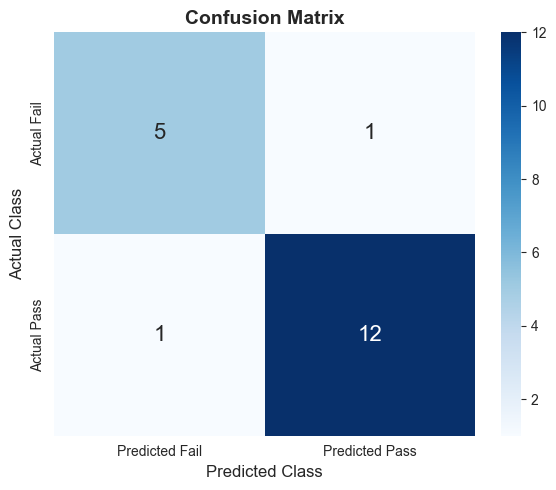

In [16]:
cm = confusion_matrix(passed, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n{'=' * 50}")
print("CONFUSION MATRIX")
print(f"{'=' * 50}")
print(f"\n                Predicted")
print(f"              Fail (0)  Pass (1)")
print(f"Actual Fail    {tn:4d}      {fp:4d}")
print(f"Actual Pass    {fn:4d}      {tp:4d}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'],
            annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.show()

Calculăm metricile de evaluare și le afișăm.

In [17]:
accuracy = accuracy_score(passed, y_pred)
precision = precision_score(passed, y_pred)
recall = recall_score(passed, y_pred)
f1 = f1_score(passed, y_pred)

print(f"{'=' * 50}")
print("PERFORMANCE METRICS")
print(f"{'=' * 50}")
print(f"True Positives (TP):   {tp}")
print(f"True Negatives (TN):   {tn}")
print(f"False Positives (FP):  {fp}")
print(f"False Negatives (FN):  {fn}")
print(f"\nAccuracy:  {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision * 100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall * 100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")

PERFORMANCE METRICS
True Positives (TP):   12
True Negatives (TN):   5
False Positives (FP):  1
False Negatives (FN):  1

Accuracy:  0.8947 (89.47%)
Precision: 0.9231 (92.31%)
Recall:    0.9231 (92.31%)
F1-Score:  0.9231


Prezentăm interpretarea metricilor.

In [18]:
print(f"{'=' * 50}")
print("INTERPRETATION")
print(f"{'=' * 50}")
print(f"Accuracy:  {accuracy * 100:.2f}% of all predictions are correct")
print(f"Precision: {precision * 100:.2f}% of predicted passes are actual passes")
print(f"Recall:    {recall * 100:.2f}% of actual passes were correctly identified")
print(f"F1-Score:  {f1:.4f} (harmonic mean of precision and recall)")

INTERPRETATION
Accuracy:  89.47% of all predictions are correct
Precision: 92.31% of predicted passes are actual passes
Recall:    92.31% of actual passes were correctly identified
F1-Score:  0.9231 (harmonic mean of precision and recall)


Calculăm predicția pentru 4 ore de studiu.

In [19]:
hours_4 = np.array([[4]])
prob_4 = model.predict_proba(hours_4)[0, 1]
pred_4 = model.predict(hours_4)[0]

print(f"{'=' * 50}")
print("PREDICTION FOR 4 HOURS OF STUDY")
print(f"{'=' * 50}")
print(f"Probability of passing: {prob_4:.4f} ({prob_4 * 100:.2f}%)")
print(f"Prediction: {'PASS' if pred_4 == 1 else 'FAIL'}")

PREDICTION FOR 4 HOURS OF STUDY
Probability of passing: 0.5860 (58.60%)
Prediction: PASS


Calculăm orele de studiu necesare pentru o șansă de 90% de a promova.

In [20]:
hours_90 = (np.log(0.9 / 0.1) - b0) / b1
prob_90_check = model.predict_proba([[hours_90]])[0, 1]

print(f"{'=' * 50}")
print("HOURS NEEDED FOR 90% PASS PROBABILITY")
print(f"{'=' * 50}")
print(f"Hours needed: {hours_90:.2f}")
print(f"Verification: {prob_90_check:.4f} ({prob_90_check * 100:.2f}%)")

HOURS NEEDED FOR 90% PASS PROBABILITY
Hours needed: 5.41
Verification: 0.9000 (90.00%)


Calculăm și afișăm probabilitățile de promovare pentru diferite ore de studiu.

In [21]:
print(f"{'=' * 50}")
print("PASS PROBABILITIES FOR DIFFERENT STUDY HOURS")
print(f"{'=' * 50}")
for h in [2, 4, 6, 8]:
    prob = model.predict_proba([[h]])[0, 1]
    print(f"{h} hours: {prob:.4f} ({prob * 100:.2f}%)")

PASS PROBABILITIES FOR DIFFERENT STUDY HOURS
2 hours: 0.0928 (9.28%)
4 hours: 0.5860 (58.60%)
6 hours: 0.9514 (95.14%)
8 hours: 0.9963 (99.63%)


## Clasificator Naive Bayes

### Cerință

Prezicerea posibilității practicării sporturilor în funcție de vreme (din curs).

Date:
|Nr| Vreme | Temperatură | Umiditate | Vânt | Joc |
|--|---------|------------|----------|------|------|
|1| Soare | Mare | Mare | Absent | Nu |
|2| Soare | Mare | Mare | Prezent | Nu |
|3| înnorat | Mare | Mare | Absent | Da |
|4| Ploaie | Medie | Mare | Absent | Da |
|5| Ploaie | Mica | Normal | Absent | Da |
|6| Ploaie | Mica | Normal | Prezent | Nu |
|7| înnorat | Mica | Normal | Prezent | Da |
|8| Soare | Medie | Mare | Absent | Nu |
|9| Soare | Mica | Normal | Absent | Da |
|10| Ploaie | Medie | Normal | Absent | Da |
|11| Soare | Medie | Normal | Prezent | Da |
|12| înnorat | Medie | Mare | Prezent | Da |
|13| înnorat | Mare | Normal | Absent | Da |
|14| Ploaie | Medie | Mare | Prezent | Nu |

Predicție nouă: Vreme=Soare, Temperatură=Mare, Umiditate=Normală, Vânt=Absent

Sarcini:
1. Calculare prior posibility P(Play=Yes) și P(Play=No)
2. Calculare probabilități condiționale pentru fiecare atribut
3. Aplicare formulă Naive Bayes
4. Caculare predicții și afișare probabilități
5. Calculare matrice de confuzie și toate metricile folosind datele de antrenament
6. Discuție Laplace smoothing

### Rezolvare

Importăm bibliotecile necesare.

In [22]:
import numpy as np
import pandas as pd # pentru tabele de date (dataframes)
from sklearn.naive_bayes import CategoricalNB # algoritmul de clasificare bazat pe formula Naive Bayes
from sklearn.preprocessing import LabelEncoder # pentru transformarea datelor din forma de cuvinte în valori numerice
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

Definim datele problemei.

In [23]:
data = {
    'Weather': ['Sunny', 'Sunny', 'Cloudy', 'Rain', 'Rain', 'Rain', 'Cloudy',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Cloudy', 'Cloudy', 'Rain'],
    'Temperature': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low',
                    'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
             'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

Creăm un dataframe cu setul de date și îl afișăm împreună cu totalul.

In [24]:
df = pd.DataFrame(data)
print("=" * 60)
print("DATASET")
print("=" * 60)
print(df.to_string(index=False))
print(f"\nTotal instances: {len(df)}")

DATASET
Weather Temperature Humidity Wind Play
  Sunny        High     High   No   No
  Sunny        High     High  Yes   No
 Cloudy        High     High   No  Yes
   Rain      Medium     High   No  Yes
   Rain         Low   Normal   No  Yes
   Rain         Low   Normal  Yes   No
 Cloudy         Low   Normal  Yes  Yes
  Sunny      Medium     High   No   No
  Sunny         Low   Normal   No  Yes
   Rain      Medium   Normal   No  Yes
  Sunny      Medium   Normal  Yes  Yes
 Cloudy      Medium     High  Yes  Yes
 Cloudy        High   Normal   No  Yes
   Rain      Medium     High  Yes   No

Total instances: 14


Numărăm câte instanțe se regăsesc în fiecare clasă (Yes or No play).

In [25]:
print(f"{'=' * 60}")
print("MANUAL CALCULATION")
print(f"{'=' * 60}")

play_yes = df[df['Play'] == 'Yes']
play_no = df[df['Play'] == 'No']
total = len(df)

print(f"Class distribution:")
print(f"  Play = Yes: {len(play_yes)} instances")
print(f"  Play = No:  {len(play_no)} instances")

MANUAL CALCULATION
Class distribution:
  Play = Yes: 9 instances
  Play = No:  5 instances


Calculăm probabilitatea fiecărui rezultat.

In [26]:
p_yes = len(play_yes) / total
p_no = len(play_no) / total

print(f"1. PRIOR PROBABILITIES:")
print(f"   P(Play=Yes) = {len(play_yes)}/{total} = {p_yes:.4f}")
print(f"   P(Play=No)  = {len(play_no)}/{total} = {p_no:.4f}")

1. PRIOR PROBABILITIES:
   P(Play=Yes) = 9/14 = 0.6429
   P(Play=No)  = 5/14 = 0.3571


Definim noua instanță pe care vrem să o clasificăm.

In [27]:
new_instance = {
    'Weather': 'Sunny',
    'Temperature': 'High',
    'Humidity': 'Normal',
    'Wind': 'No'
}

print(f"2. NEW INSTANCE TO CLASSIFY:")
for key, value in new_instance.items():
    print(f"   {key}: {value}")

2. NEW INSTANCE TO CLASSIFY:
   Weather: Sunny
   Temperature: High
   Humidity: Normal
   Wind: No


Calculăm probabilitatea condițională pentru fiecare caracteristică (feature) de intrare.

In [28]:
print(f"3. CONDITIONAL PROBABILITIES for Play=Yes:")
# din zilele în care s-a jucat ...
p_sunny_yes = len(play_yes[play_yes['Weather'] == 'Sunny']) / len(play_yes) # în câte a fost soare?
p_high_yes = len(play_yes[play_yes['Temperature'] == 'High']) / len(play_yes) # în câte a fost temperatură mare?
p_normal_yes = len(play_yes[play_yes['Humidity'] == 'Normal']) / len(play_yes) # în câte a fost umiditate normală?
p_no_wind_yes = len(play_yes[play_yes['Wind'] == 'No']) / len(play_yes) # în câte nu a fost vânt?

print(f"   P(Sunny|Yes)   = {len(play_yes[play_yes['Weather'] == 'Sunny'])}/{len(play_yes)} = {p_sunny_yes:.4f}")
print(f"   P(High|Yes)    = {len(play_yes[play_yes['Temperature'] == 'High'])}/{len(play_yes)} = {p_high_yes:.4f}")
print(f"   P(Normal|Yes)  = {len(play_yes[play_yes['Humidity'] == 'Normal'])}/{len(play_yes)} = {p_normal_yes:.4f}")
print(f"   P(No wind|Yes) = {len(play_yes[play_yes['Wind'] == 'No'])}/{len(play_yes)} = {p_no_wind_yes:.4f}")

print(f"\n4. CONDITIONAL PROBABILITIES for Play=No:")
# din zilele în care NU s-a jucat ...
p_sunny_no = len(play_no[play_no['Weather'] == 'Sunny']) / len(play_no) # în câte a fost soare?
p_high_no = len(play_no[play_no['Temperature'] == 'High']) / len(play_no) # în câte a fost temperatură mare?
p_normal_no = len(play_no[play_no['Humidity'] == 'Normal']) / len(play_no) # în câte a fost umiditate normală?
p_no_wind_no = len(play_no[play_no['Wind'] == 'No']) / len(play_no) # în câte nu a fost vânt?

print(f"   P(Sunny|No)   = {len(play_no[play_no['Weather'] == 'Sunny'])}/{len(play_no)} = {p_sunny_no:.4f}")
print(f"   P(High|No)    = {len(play_no[play_no['Temperature'] == 'High'])}/{len(play_no)} = {p_high_no:.4f}")
print(f"   P(Normal|No)  = {len(play_no[play_no['Humidity'] == 'Normal'])}/{len(play_no)} = {p_normal_no:.4f}")
print(f"   P(No wind|No) = {len(play_no[play_no['Wind'] == 'No'])}/{len(play_no)} = {p_no_wind_no:.4f}")

3. CONDITIONAL PROBABILITIES for Play=Yes:
   P(Sunny|Yes)   = 2/9 = 0.2222
   P(High|Yes)    = 2/9 = 0.2222
   P(Normal|Yes)  = 6/9 = 0.6667
   P(No wind|Yes) = 6/9 = 0.6667

4. CONDITIONAL PROBABILITIES for Play=No:
   P(Sunny|No)   = 3/5 = 0.6000
   P(High|No)    = 2/5 = 0.4000
   P(Normal|No)  = 1/5 = 0.2000
   P(No wind|No) = 2/5 = 0.4000


Aplicăm formula Naive Bayes pentru noua instanță.

In [29]:
prob_yes = p_yes * p_sunny_yes * p_high_yes * p_normal_yes * p_no_wind_yes
prob_no = p_no * p_sunny_no * p_high_no * p_normal_no * p_no_wind_no

print(f"5. NAIVE BAYES CALCULATION:")
print(f"   P(Yes|X) ∝ {p_yes:.4f} × {p_sunny_yes:.4f} × {p_high_yes:.4f} × {p_normal_yes:.4f} × {p_no_wind_yes:.4f}")
print(f"           = {prob_yes:.6f}")
print(f"\n   P(No|X)  ∝ {p_no:.4f} × {p_sunny_no:.4f} × {p_high_no:.4f} × {p_normal_no:.4f} × {p_no_wind_no:.4f}")
print(f"           = {prob_no:.6f}")

5. NAIVE BAYES CALCULATION:
   P(Yes|X) ∝ 0.6429 × 0.2222 × 0.2222 × 0.6667 × 0.6667
           = 0.014109

   P(No|X)  ∝ 0.3571 × 0.6000 × 0.4000 × 0.2000 × 0.4000
           = 0.006857


Calculăm probabilitățile normalizate.

In [30]:
total_prob = prob_yes + prob_no
prob_yes_norm = prob_yes / total_prob
prob_no_norm = prob_no / total_prob

print(f"6. NORMALIZED PROBABILITIES:")
print(f"   P(Yes|X) = {prob_yes:.6f} / {total_prob:.6f} = {prob_yes_norm:.4f} ({prob_yes_norm * 100:.2f}%)")
print(f"   P(No|X)  = {prob_no:.6f} / {total_prob:.6f} = {prob_no_norm:.4f} ({prob_no_norm * 100:.2f}%)")

6. NORMALIZED PROBABILITIES:
   P(Yes|X) = 0.014109 / 0.020966 = 0.6729 (67.29%)
   P(No|X)  = 0.006857 / 0.020966 = 0.3271 (32.71%)


Afișăm predicția calculată manual.

In [31]:
prediction_manual = 'Yes' if prob_yes > prob_no else 'No'
print(f"7. PREDICTION: Play = {prediction_manual}")
print(f"   (Since P(Yes|X) {'>' if prob_yes > prob_no else '<'} P(No|X))")

7. PREDICTION: Play = Yes
   (Since P(Yes|X) > P(No|X))


Testăm folosind algoritmul Naive Bayes definit în `scikit-learn`.

In [32]:
print(f"{'=' * 60}")
print("SKLEARN IMPLEMENTATION")
print(f"{'=' * 60}")

le_dict = {}
df_encoded = df.copy()

for column in df.columns:
    le = LabelEncoder() # încarcă LabelEncoder-ul (pentru transformarea cuvintelor în date numerice)
    df_encoded[column] = le.fit_transform(df[column]) # transformă datele
    le_dict[column] = le # salvează coloana transformată

X = df_encoded.drop('Play', axis=1).values # datele de intrare
y = df_encoded['Play'].values # datele de ieșire (dacă s-a jucat sau nu)

nb_model = CategoricalNB() # încarcă modelul de clasificare Naive Bayes
nb_model.fit(X, y) # antrenează modelul

y_pred = nb_model.predict(X) # calculează predicția

# codifică instanța nouă pe care dorim să o testăm
new_instance_encoded = []
for col in ['Weather', 'Temperature', 'Humidity', 'Wind']:
    value = new_instance[col]
    encoded_value = le_dict[col].transform([value])[0]
    new_instance_encoded.append(encoded_value)

new_instance_array = np.array([new_instance_encoded])
prediction_sklearn = nb_model.predict(new_instance_array)[0] # calculează predicția
probabilities_sklearn = nb_model.predict_proba(new_instance_array)[0] # calculează probabilitățile

prediction_label = le_dict['Play'].inverse_transform([prediction_sklearn])[0] # transformă predicția numerică în cuvânt

print(f"\nPrediction for new instance: {prediction_label}")
print(f"Probabilities: No={probabilities_sklearn[0]:.4f}, Yes={probabilities_sklearn[1]:.4f}")

SKLEARN IMPLEMENTATION

Prediction for new instance: Yes
Probabilities: No=0.3351, Yes=0.6649


Calculăm și afișăm matricea de confuzie.

In [33]:
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"{'=' * 60}")
print("CONFUSION MATRIX (Training Data)")
print(f"{'=' * 60}")
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual No     {tn:3d}     {fp:3d}")
print(f"Actual Yes    {fn:3d}     {tp:3d}")


CONFUSION MATRIX (Training Data)

                Predicted
              No      Yes
Actual No       4       1
Actual Yes      0       9


Calculăm și afișăm metricile de performanță.

In [34]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"{'=' * 60}")
print("PERFORMANCE METRICS")
print(f"{'=' * 60}")
print(f"True Positives (TP):   {tp}")
print(f"True Negatives (TN):   {tn}")
print(f"False Positives (FP):  {fp}")
print(f"False Negatives (FN):  {fn}")
print(f"\nAccuracy:  {accuracy:.4f} ({accuracy * 100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision * 100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall * 100:.2f}%)")
print(f"F1-Score:  {f1:.4f}")

PERFORMANCE METRICS
True Positives (TP):   9
True Negatives (TN):   4
False Positives (FP):  1
False Negatives (FN):  0

Accuracy:  0.9286 (92.86%)
Precision: 0.9000 (90.00%)
Recall:    1.0000 (100.00%)
F1-Score:  0.9474


Vizualizăm matricea de confuzie și metricile de performanță.

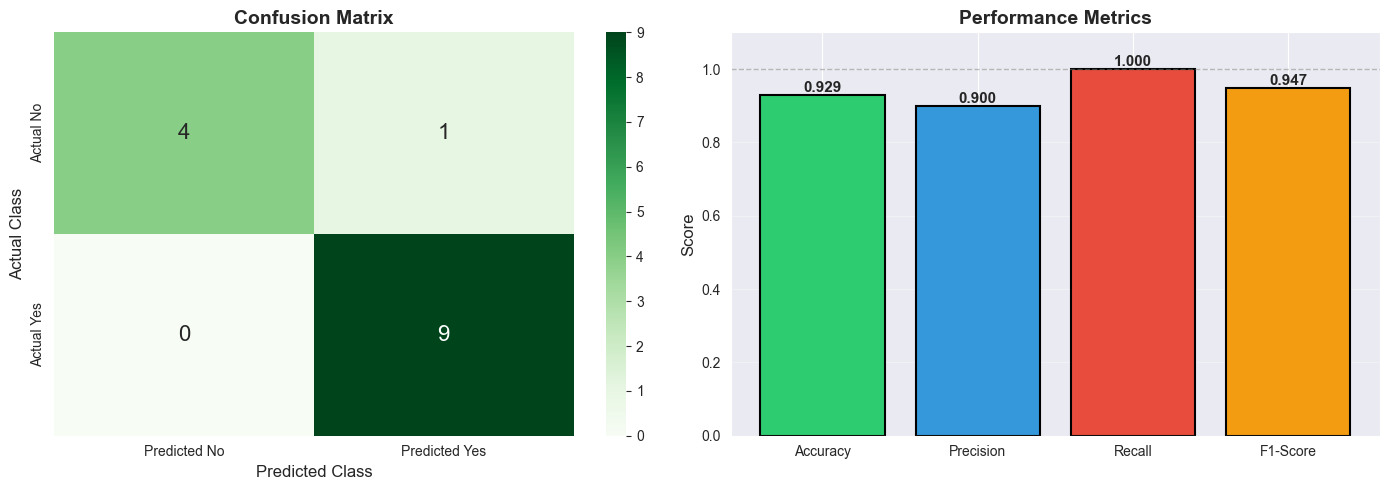

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'],
            annot_kws={"size": 16})
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Class', fontsize=12)
axes[0].set_xlabel('Predicted Class', fontsize=12)

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

bars = axes[1].bar(metrics_names, metrics_values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Performance Metrics', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 1.1)
axes[1].axhline(y=1.0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
axes[1].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.3f}',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

Scurtă descriere Laplace smoothing

In [36]:
print(f"\n{'=' * 60}")
print("LAPLACE SMOOTHING")
print(f"{'=' * 60}")
print("Laplace smoothing prevents zero probabilities when a feature")
print("value never appears with a certain class in the training data.")
print("\nFormula: P(x_i|c_j) = (n_ij + 1) / (n_j + c)")
print("  where n_ij = count of feature value in class")
print("        n_j = total count of class")
print("        c = number of classes")
print("\nExample: If 'Windy' weather never appeared with Play=Yes,")
print("without smoothing P(Windy|Yes) = 0, making P(Yes|X) = 0")
print("With smoothing: P(Windy|Yes) = (0+1)/(9+2) = 0.091")
print("\nThe sklearn CategoricalNB uses alpha parameter for smoothing.")
print(f"Current model alpha: {nb_model.alpha}")


LAPLACE SMOOTHING
Laplace smoothing prevents zero probabilities when a feature
value never appears with a certain class in the training data.

Formula: P(x_i|c_j) = (n_ij + 1) / (n_j + c)
  where n_ij = count of feature value in class
        n_j = total count of class
        c = number of classes

Example: If 'Windy' weather never appeared with Play=Yes,
without smoothing P(Windy|Yes) = 0, making P(Yes|X) = 0
With smoothing: P(Windy|Yes) = (0+1)/(9+2) = 0.091

The sklearn CategoricalNB uses alpha parameter for smoothing.
Current model alpha: 1.0


# Temă

**Sarcină:** Rezolvați și prezentați problemele următoare similar cu cele rezolvate la laborator.

Fiecare echipă este necesar să rezolve 2 probleme: Naive Bayes și una dintre regresii.
Pentru 2 puncte bonus (în caz de întârziere a temei) se vor rezolva toate 3 problemele.

## Regresie polinomială

Un fermier dorește să prezică randamentul de grâu în funcție de cantitatea de fertilizator utilizată.

Date:
- Fertilizator (kg/ hectar): `[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]`
- Randament (tone/ hectar): `[2.1, 2.8, 3.6, 4.5, 5.2, 5.8, 6.2, 6.4, 6.5, 6.4, 6.2, 5.9, 5.4, 4.8, 4.0]`

Notă: prea puțin fertilizator = randament mic; cantitate optimă = randament mare; prea mult = scădere randament.

Sarcini:
1. Împărțire date în seturi de antrenament (primele 12 puncte) și testare (ultimele 3 puncte)
2. Antrenare modele de regresie polinomială (grad 1, 2, 3 și 4)
3. Calculare MAE, MSE, RMSE și R<sup>2</sup> atât pentru datele de antrenare cât și testare
4. Identificarea cantității optime de fertilizator
5. Explicare care grad reprezintă cel mai bine realitatea
6. Vizualizarea tuturor modelelor și discutarea overfitting

## Regresie logistică

Dorim să prezicem șansele de boală cardiacă în funcție de vârstă și nivel de colesterol.

Date:
- Vârstă: `[25, 30, 35, 40, 45, 50, 52, 55, 58, 60, 62, 65, 68, 70, 72, 75, 78, 80]`
- Colesterol (mg/dL): `[180, 190, 195, 200, 210, 220, 235, 240, 250, 255, 265, 270, 280, 285, 295, 300, 310, 320]`
- Boală cardiacă (1=Da, 0=Nu): `[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]`

Sarcini:
1. Împărțire date în seturi de antrenament (primele 14 puncte) și testare (ultimele 4 puncte)
2. Antrenare model de regresie logistică
3. Calcularea tuturor metricilor pentru seturile de date de antrenare și testare
4. Vizualizarea funcției de decizie
5. Prezicerea probabilității de boală pentru o persoană de 55 de ani cu nivelul de colesterol 260 mg/dl
6. Discutarea importanței fiecărui feature (caracteristici)

## Clasificator Naive Bayes

Clasificare email drept spam sau nu bazat pe prezența cuvinetelor.

Date:
| Email | Conține "Free" | Conține "Money" | Conține "Winner" | Are link | Spam |
|-------|----------------|------------------|-------------------|----------|------|
| 1 | Da | Da | Da | Da | Da |
| 2 | Da | Da | Nu | Da | Da |
| 3 | Nu | Nu | Nu | Nu | Nu |
| 4 | Da | Nu | Da | Da | Da |
| 5 | Nu | Nu | Nu | Da | Nu |
| 6 | Da | Da | Da | Da | Da |
| 7 | Nu | Da | Nu | Da | Da |
| 8 | Nu | Nu | Nu | Nu | Nu |
| 9 | Da | Da | Da | Nu | Da |
| 10 | Nu | Nu | Da | Nu | Nu |
| 11 | Da | Nu | Nu | Da | Da |
| 12 | Nu | Nu | Nu | Nu | Nu |
| 13 | Da | Da | Da | Da | Da |
| 14 | Nu | Da | Da | Da | Da |
| 15 | Nu | Nu | Nu | Da | Nu |
| 16 | Da | Da | Nu | Da | Da |
| 17 | Nu | Nu | Nu | Nu | Nu |
| 18 | Da | Nu | Da | Da | Da |
| 19 | Nu | Nu | Da | Nu | Da |
| 20 | Nu | Nu | Nu | Nu | Nu |

Predicție nouă: Free=Da, Money=Nu, Winner=Da, Link=Da

Sarcini:
1. Împărțire date în seturi de antrenament (primele 16 puncte) și testare (ultimele 4 puncte)
2. Calculare manual prior posibility P(Play=Yes) și P(Play=No)
3. Calculare manual probabilități condiționale
4. Clasificarea unui nou email: `Free=Yes,Money=No,Winner=Yes,HasLink=Yes`
5. Antrenare model și comparare rezultate
6. Calculare matrice de confuzie și toate metricile atât pentru datele de antrenament cât și de test
7. Aplicare Laplace smoothing și observat efecte
8. Vizualizare importanță caracteristici (care cuvinte sunt cele mai bune indicatoare pentru spam)